In [16]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_Q_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [17]:
data

['t_n55          8.5905 ( 8.2855,  8.9694) ( 8.2702,  8.9468)  0.6765 (Jnode 106)\n',
 't_n56          8.5444 ( 8.2391,  8.9108) ( 8.2158,  8.8820)  0.6662 (Jnode 105)\n',
 't_n57          7.9079 ( 7.6297,  8.2194) ( 7.6223,  8.2099)  0.5876 (Jnode 104)\n',
 't_n58          6.7261 ( 6.4947,  6.9508) ( 6.4938,  6.9496)  0.4558 (Jnode 103)\n',
 't_n59          6.4586 ( 6.2306,  6.6786) ( 6.2306,  6.6786)  0.4480 (Jnode 102)\n',
 't_n60          6.1345 ( 5.9103,  6.3522) ( 5.9074,  6.3489)  0.4415 (Jnode 101)\n',
 't_n61          5.6362 ( 5.4129,  5.8523) ( 5.4146,  5.8534)  0.4387 (Jnode 100)\n',
 't_n62          2.6067 ( 2.3185,  2.8988) ( 2.3071,  2.8861)  0.5790 (Jnode 99)\n',
 't_n63          3.9987 ( 3.7555,  4.2400) ( 3.7570,  4.2410)  0.4840 (Jnode 98)\n',
 't_n64          2.8694 ( 2.6406,  3.1019) ( 2.6447,  3.1047)  0.4600 (Jnode 97)\n',
 't_n65          2.5006 ( 2.2894,  2.7210) ( 2.2938,  2.7250)  0.4311 (Jnode 96)\n',
 't_n66          1.9490 ( 1.7623,  2.1450) ( 1.7599,  2.14

In [18]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [19]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [20]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [21]:
posterior_mean_iqtree

[8.5905,
 8.5444,
 7.9079,
 6.7261,
 6.4586,
 6.1345,
 5.6362,
 2.6067,
 3.9987,
 2.8694,
 2.5006,
 1.949,
 1.3334,
 0.8938,
 0.3598,
 3.0149,
 6.21,
 5.5697,
 5.6089,
 4.0356,
 3.5583,
 3.2523,
 6.1249,
 5.793,
 5.5418,
 5.2541,
 4.7955,
 4.6141,
 4.016,
 3.6531,
 3.3188,
 2.5163,
 2.2427,
 4.0954,
 3.2825,
 5.9693,
 1.4687,
 5.7859,
 5.3695,
 4.7598,
 4.3715,
 3.2074,
 3.5766,
 4.5891,
 4.3349,
 3.8886,
 3.1221,
 3.8971,
 7.1186,
 5.4301,
 3.4744,
 2.7047,
 5.8921]

In [22]:
lower_ci_iqtree

[]

In [23]:
upper_ci_iqtree

[]

In [24]:
file_LG = open("LG_G4_codeml_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [26]:
posterior_mean_baseml

[8.6238,
 8.578,
 7.9256,
 6.7301,
 6.4557,
 6.1244,
 5.6265,
 2.6441,
 3.9803,
 2.8612,
 2.4905,
 1.9354,
 1.3282,
 0.891,
 0.3598,
 3.0053,
 6.2095,
 5.5369,
 5.5946,
 4.0403,
 3.544,
 3.2402,
 6.135,
 5.7912,
 5.5501,
 5.2502,
 4.7911,
 4.5993,
 3.9975,
 3.6241,
 3.2875,
 2.5015,
 2.2227,
 4.0967,
 3.2785,
 5.9671,
 1.515,
 5.7816,
 5.3591,
 4.7547,
 4.3502,
 3.2014,
 3.5592,
 4.5726,
 4.3111,
 3.8446,
 3.1132,
 3.9117,
 7.1204,
 5.4288,
 3.4698,
 2.761,
 5.9806]

In [27]:
posterior_mean_iqtree

[8.5905,
 8.5444,
 7.9079,
 6.7261,
 6.4586,
 6.1345,
 5.6362,
 2.6067,
 3.9987,
 2.8694,
 2.5006,
 1.949,
 1.3334,
 0.8938,
 0.3598,
 3.0149,
 6.21,
 5.5697,
 5.6089,
 4.0356,
 3.5583,
 3.2523,
 6.1249,
 5.793,
 5.5418,
 5.2541,
 4.7955,
 4.6141,
 4.016,
 3.6531,
 3.3188,
 2.5163,
 2.2427,
 4.0954,
 3.2825,
 5.9693,
 1.4687,
 5.7859,
 5.3695,
 4.7598,
 4.3715,
 3.2074,
 3.5766,
 4.5891,
 4.3349,
 3.8886,
 3.1221,
 3.8971,
 7.1186,
 5.4301,
 3.4744,
 2.7047,
 5.8921]

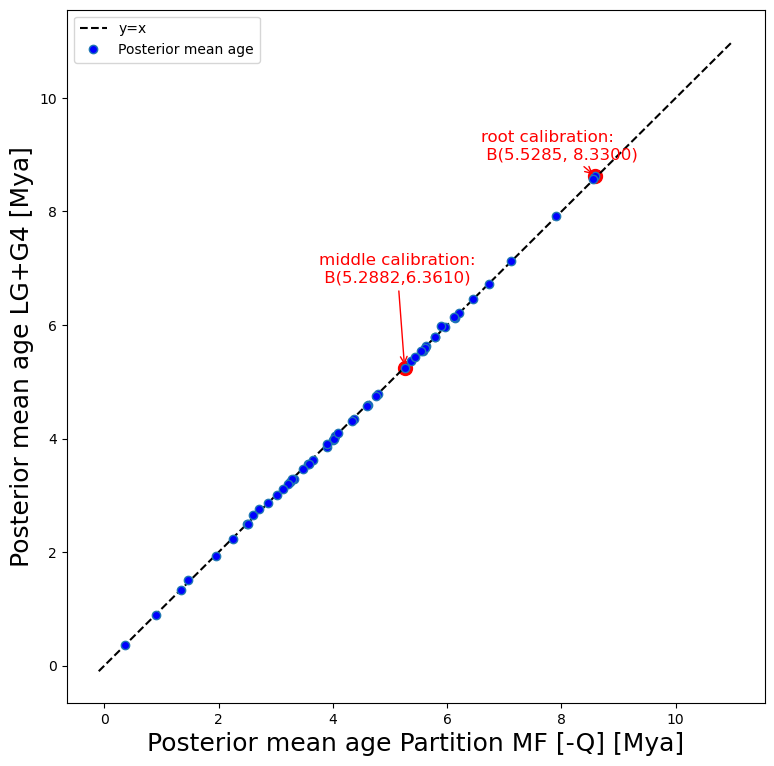

In [28]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1, 11], 
        [-0.1, 11], 
        'k--', label='y=x')
points = ax.plot(posterior_mean_iqtree, posterior_mean_baseml, 'o', label='Posterior mean age')


points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[25], posterior_mean_baseml[25], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n B(5.5285, 8.3300)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0] -2,  posterior_mean_baseml[0] + 0.3),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
ax.annotate('middle calibration:\n B(5.2882,6.3610)', 
        xy=(posterior_mean_iqtree[25], posterior_mean_baseml[25]), 
        xytext=(posterior_mean_iqtree[25] -1.5,  posterior_mean_baseml[25] + 1.5),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
 
 
# Labels and title
ax.set_ylabel('Posterior mean age LG+G4 [Mya]', fontsize=18)
ax.set_xlabel('Posterior mean age Partition MF [-Q] [Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and Partition MF [-Q] [t80 ~ B(5.2882,6.3610)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_partition_MF_Q_middle_scatter.png')

In [29]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')